<b>Boston House Pricing</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
from scipy.stats import norm
from scipy import stats

full_path = 'jupyter_notebook/'
rd = pd.read_csv(full_path + "house_train.csv")
rd.shape

(1460, 81)

In [2]:
rd.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
rd.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
rd.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [5]:
rd['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

This means that minimum price is 34900 and maximum price is 755000. We don't see minimum value with 0 price, this means that no null value exists in column SalePrice

<b>Histogram</b>

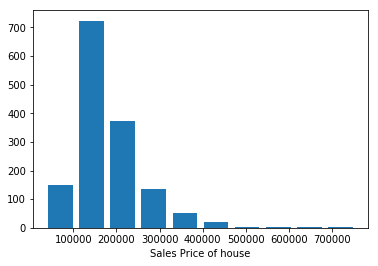

In [6]:
import matplotlib.pyplot as plt
plt.hist(rd['SalePrice'],histtype='bar',rwidth=0.8)
plt.xlabel("Sales Price of house")
plt.show()

The above graph shows that data has been skewed and it is a positive skewness

<b>Correlation</b>

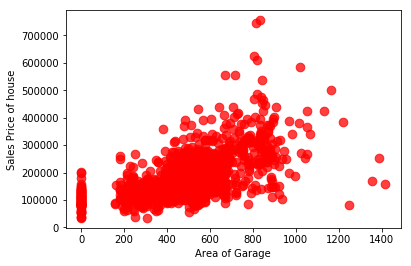

In [7]:
# Garage Area vs Sale Price

x = rd['GarageArea']
y = rd['SalePrice']
plt.scatter(x,y,c='red',s=75,alpha=0.75)
plt.xlabel("Area of Garage")
plt.ylabel("Sales Price of house")
plt.show()

It seems that area of garage and sales price are linearly correlated with a positive correlaation.

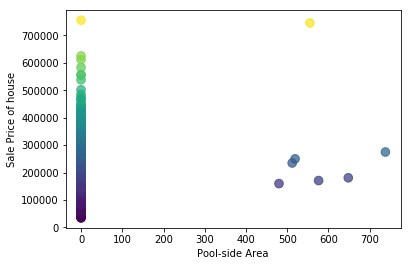

In [8]:
# Sale Price vs Pool Area

x = rd['PoolArea']
y = rd['SalePrice']
plt.scatter(x,y,c=y,s=75,alpha=0.75)
plt.xlabel("Pool-side Area")
plt.ylabel("Sale Price of house")
plt.show()

As most of the houses doesn't have pool area. So, there are lesser values for pool area and this factor doesnot explain any relation with sale price

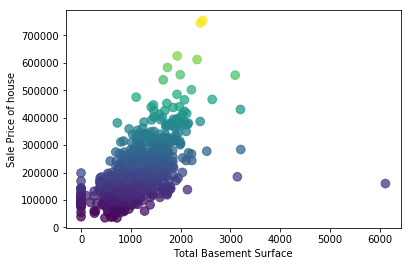

In [9]:
# Sale Price vs Total Basement Surface

x = rd['TotalBsmtSF']
y = rd['SalePrice']

plt.scatter(x,y,s=75,c=y,alpha=0.75)
plt.xlabel("Total Basement Surface")
plt.ylabel("Sale Price of house")
plt.show()

From above figure, it is clear that there is strong correlation between total basement surface area and sale price of the house. If total basement surface area is zero then the sale price is very close to zero also.

<b>BoxPlots</b>

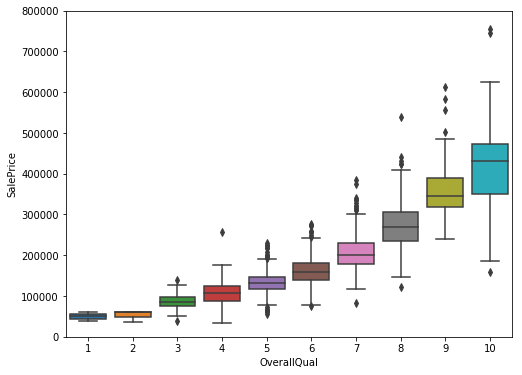

In [10]:
# Sale Price of house vs Overall Quality of house

concat_data = pd.concat([rd['SalePrice'],rd['OverallQual']],axis=1)

f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='OverallQual', y='SalePrice', data = concat_data)
fig.axis(ymin=0,ymax=800000)
plt.show()

From the above graph, we come to know that if the overall quality is 10 then, the lowest house price is approximately 200000.

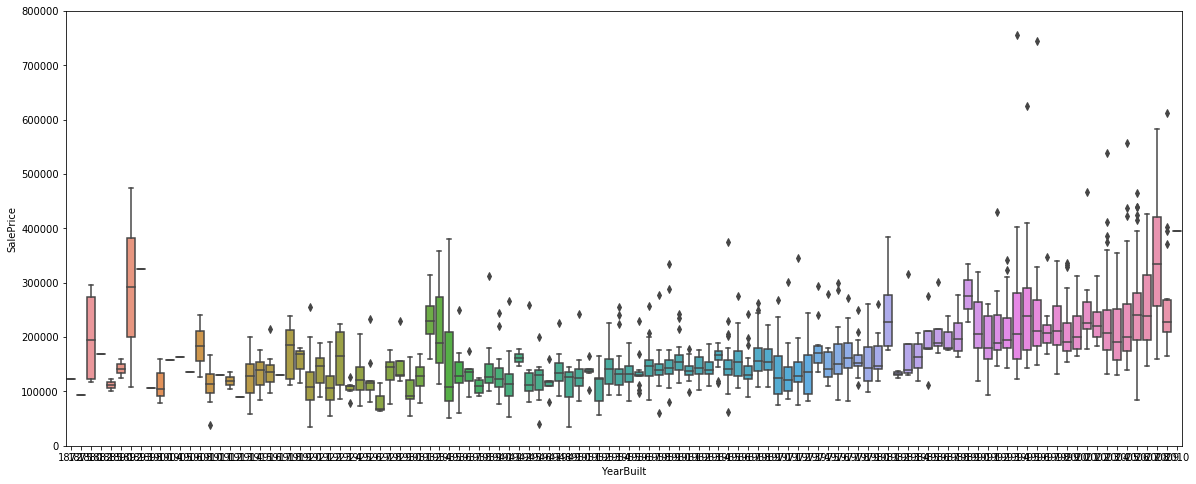

In [11]:
# Sale Price of house vs Year of Built

concat_data = pd.concat([rd['SalePrice'],rd['YearBuilt']],axis=1)

f,x = plt.subplots(figsize=(20,8))

fig = sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = concat_data)
fig.axis(ymin=0,ymax=800000)
plt.show()

1.) Living area and total basement surface area seems to be lineraly correlated with sale price of house. This means that if one increases, other will gradually increase.

2.) From the second graph, we came to know that the sales of the houses increases with the date of building of the house.

<b>Correlation Matrix</b>

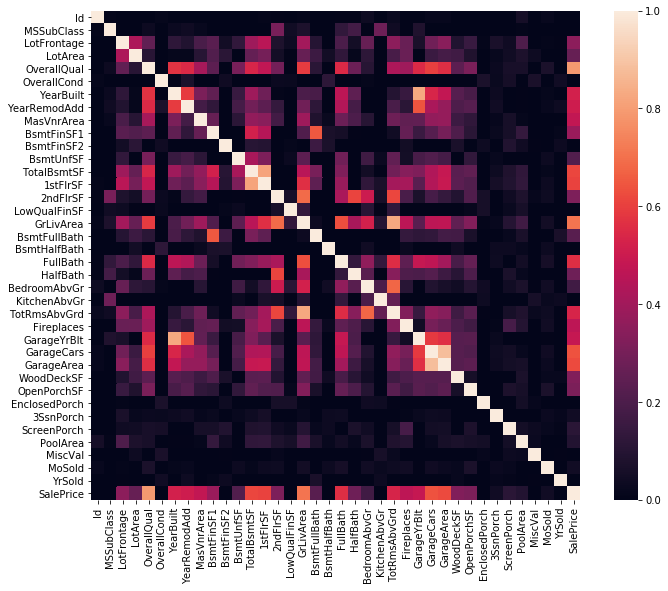

In [12]:
# Correlation Matrix

cor_mat = rd.corr()
f,x = plt.subplots(figsize=(12,9))
sns.heatmap(cor_mat,vmin=0,vmax=1,square=True)
plt.show()

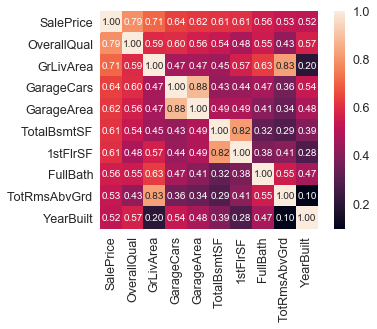

In [13]:
# Sale Price of house correlation matrix (zoomed heatmap style)

k = 10
colum = cor_mat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(rd[colum].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10},yticklabels=colum.values, xticklabels=colum.values)
plt.show()

According to our crystal ball, these are the variables most correlated with 'SalePrice'.
'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'
'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables.
'TotRmsAbvGrd' and 'GrLivArea' are also some of the most strongly correlated variables.
'TotalBasmtSF' and '1stFlrSF' also highly correlated
'YearBuilt' slightly correlated with Sale Prce

<b>Scatter Plot between Sales Price of house and Correlated Variables</b>

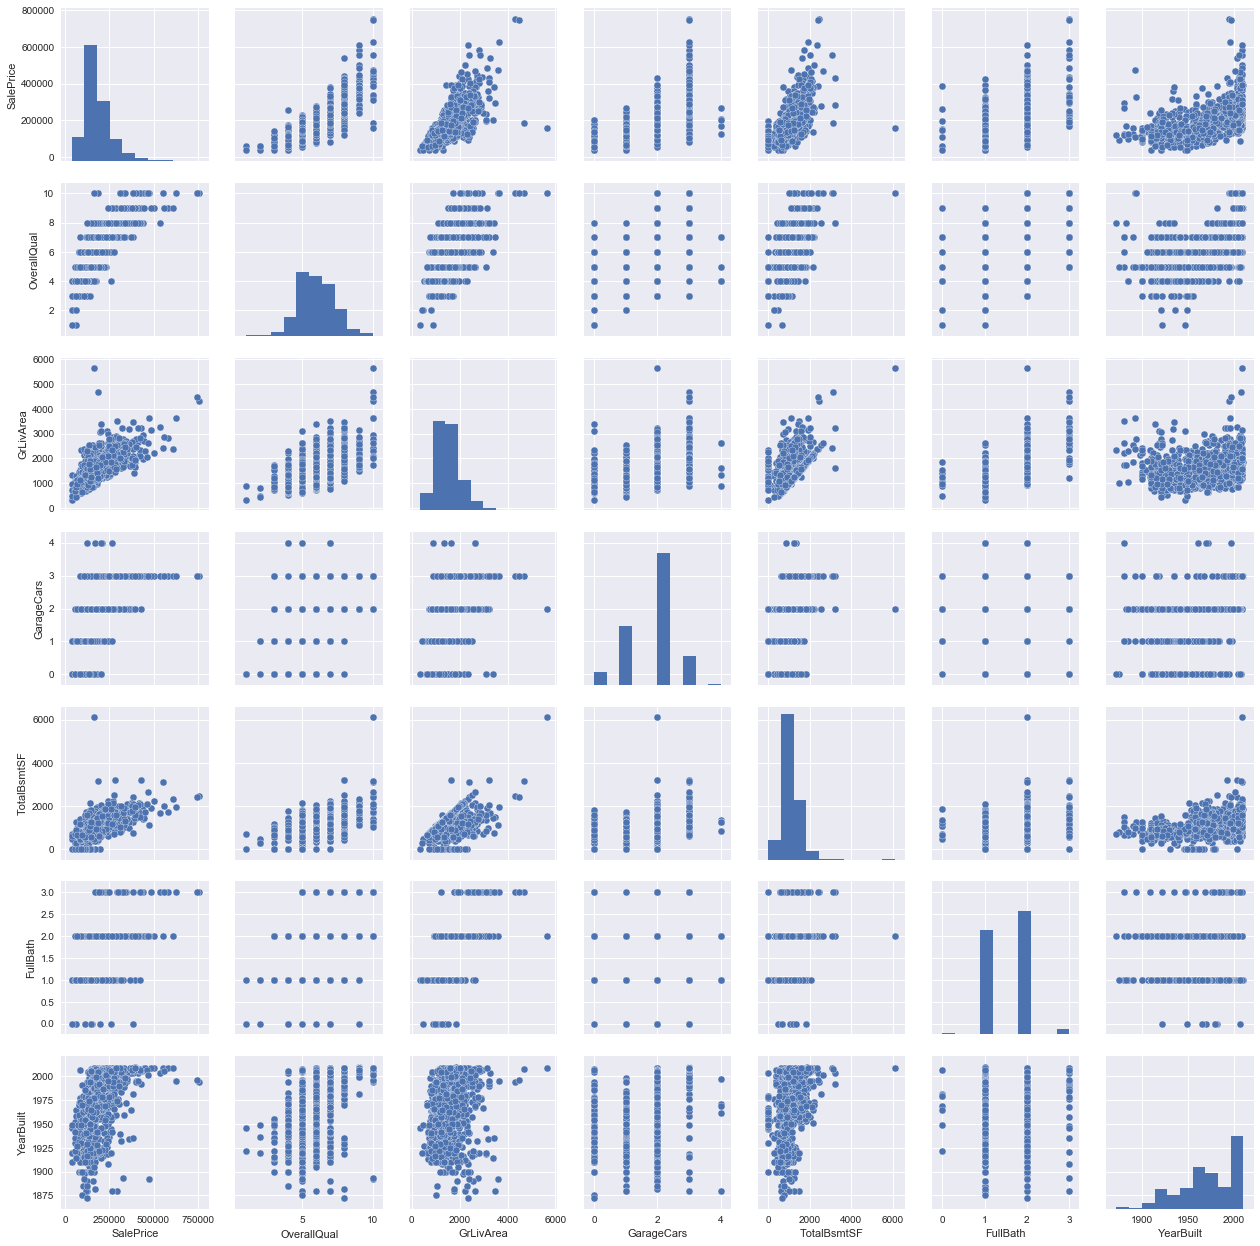

In [14]:
# ScatterPlot

sns.set()
colum = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(rd[colum],size=2.5)
plt.show()

TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which
almost acts like a border. It totally makes sense that the majority of the dots stay below that line.
Basement areas can be equal to the above ground living area, but it is not expected a basement
area bigger than the above ground living area

<b>Handling Missing Values</b>

In [15]:
total_vl = rd.isnull().sum().sort_values(ascending=False)
percent = (rd.isnull().sum() / rd.isnull().count()).sort_values(ascending=False)
missing_data_val = pd.concat([total_vl,percent],axis=1,keys=['Total','Percent'])
missing_data_val.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [16]:
clean_pr = rd.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu','LotFrontage', 'GarageCond', 'GarageType', 'GarageYrBlt', \
'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual','MasVnrArea', 'MasVnrType', 'Electrical', 'GarageFinish','GarageQual' ],1)
total_missing = clean_pr.isnull().sum().sort_values(ascending=False)
print(total_missing)

SalePrice        0
OverallQual      0
BsmtUnfSF        0
BsmtFinSF2       0
BsmtFinSF1       0
Foundation       0
ExterCond        0
ExterQual        0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
RoofStyle        0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
HouseStyle       0
SaleCondition    0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Street           0
LotArea          0
MSZoning         0
MSSubClass       0
                ..
HeatingQC        0
CentralAir       0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageArea       0
GarageCars       0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath    

<b>Normality</b>

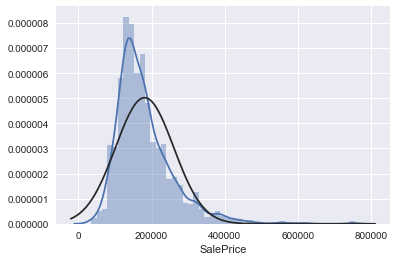

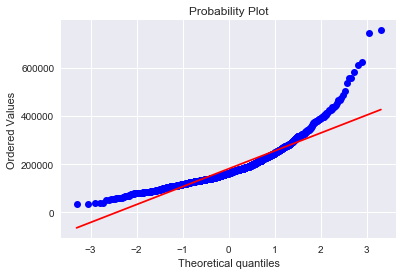

In [17]:
sns.distplot(clean_pr['SalePrice'],fit=norm)
fig = plt.figure()
res = stats.probplot(clean_pr['SalePrice'],plot=plt)
plt.show()

We can contribute from the above graph that the data is positively skewed. So, we can apply log function to convert skewed data into a normal distribution.

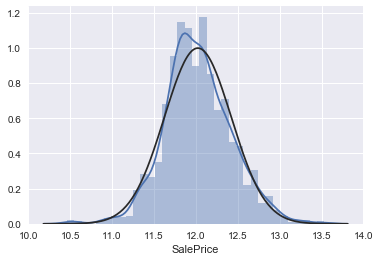

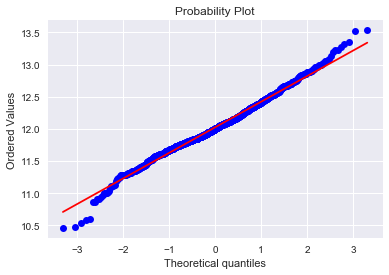

In [18]:
clean_pr['SalePrice'] = np.log(clean_pr['SalePrice'])

sns.distplot(clean_pr['SalePrice'],fit=norm)
fig = plt.figure()
res = stats.probplot(clean_pr['SalePrice'],plot=plt)
plt.show()

<b>Handling Dummy Variables</b>

In [19]:
rd_clean_final = pd.get_dummies(clean_pr)
rd_clean_final.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


<b>Linear Regression to predict housing price</b>

In [20]:
# Linear Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = rd_clean_final.drop(['SalePrice'],1)
y = rd_clean_final['SalePrice']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
regr = LinearRegression()

clf = regr.fit(x_train,y_train)
clf_score = clf.score(x_test,y_test)
print(clf_score)

0.863799919007695


In [21]:
clf_predict = clf.predict(x_test)
print(clf_predict[:5])
print(y_test[:5])

[12.04708027 12.22846394 12.13277665 11.70860606 11.50644199]
914     12.065275
846     12.269047
32      12.100156
1150    11.728037
1376    11.418615
Name: SalePrice, dtype: float64


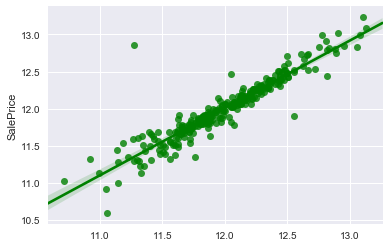

In [22]:
rg = sns.regplot(clf_predict,y_test,color='green')
plt.show()

This graph shows that the preedicted datapoints are very close to the bestfit line

<u>Concatinating the predicted sales price of the house with testing dataset</u>

In [23]:
clf_predict_price = pd.DataFrame(clf_predict)

x_test_result = pd.DataFrame(x_test)
x_test_result.head()
x_test_result['true_sales_price'] = y_test
x_test_result['predicted_sales_price'] = clf_predict_price
x_test_result.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,true_sales_price,predicted_sales_price
914,915,160,3000,6,5,2009,2009,294,0,318,...,0,0,0,0,0,0,0,1,12.065275,NaN
846,847,60,9317,7,5,1993,1993,513,0,227,...,0,1,0,0,0,0,1,0,12.269047,NaN
32,33,20,11049,8,5,2007,2007,0,0,1234,...,0,1,0,0,0,0,1,0,12.100156,12.780248
1150,1151,20,8280,6,5,1950,1950,0,0,932,...,0,1,0,0,0,0,1,0,11.728037,NaN
1376,1377,30,6292,6,5,1930,1950,384,0,384,...,0,1,0,0,0,0,1,0,11.418615,NaN


In [24]:
x_test_result.to_csv('housing_price_prediction_with_linear_regresssion.csv')

<b>Implementation of Non Linear Regression to this model</b>

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

x = rd_clean_final.drop(['SalePrice'],1)
y = rd_clean_final['SalePrice']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = GradientBoostingRegressor()
clf = model.fit(x_train, y_train)
clf_score = clf.score(x_test, y_test)
print(clf_score)

0.8910133109744156


The model accuracy is 90%. This means that out of 100 houses, the model can able to predict price of 90 houses correctly.

<b>Single Gradient Boosting</b>

In [32]:
db_feature = clean_pr['OverallQual']

x_train_s,x_test_s,y_train_s,y_test_s = train_test_split(db_feature,y,test_size=0.2)

x_train_s = x_train_s.values.reshape(-1,1)
x_test_s = x_test_s.values.reshape(-1,1)

clf = model.fit(x_train_s,y_train_s)
clf_score = clf.score(x_test_s,y_test_s)
print(clf_score)

0.5587518614373475


In [33]:
db_feature = clean_pr['GrLivArea']

x_train_s,x_test_s,y_train_s,y_test_s = train_test_split(db_feature,y,test_size=0.2)

x_train_s = x_train_s.values.reshape(-1,1)
x_test_s = x_test_s.values.reshape(-1,1)

clf = model.fit(x_train_s,y_train_s)

clf_score = clf.score(x_test_s,y_test_s)
print(clf_score)

0.5358089027452051


In [34]:
db_feature = clean_pr['TotalBsmtSF']

x_train_s,x_test_s,y_train_s,y_test_s = train_test_split(db_feature,y,test_size=0.2)

x_train_s = x_train_s.values.reshape(-1,1)
x_test_s = x_test_s.values.reshape(-1,1)

clf = model.fit(x_train_s,y_train_s)

clf_score = clf.score(x_test_s,y_test_s)
print(clf_score)

0.40314603383349645


In [35]:
db_feature = clean_pr['GarageCars']

x_train_s,x_test_s,y_train_s,y_test_s = train_test_split(db_feature,y,test_size=0.2)

x_train_s = x_train_s.values.reshape(-1,1)
x_test_s = x_test_s.values.reshape(-1,1)

clf = model.fit(x_train_s,y_train_s)

clf_score = clf.score(x_test_s,y_test_s)
print(clf_score)

0.486845060273998


In [36]:
db_feature = clean_pr['GarageArea']

x_train_s,x_test_s,y_train_s,y_test_s = train_test_split(db_feature,y,test_size=0.2)

x_train_s = x_train_s.values.reshape(-1,1)
x_test_s = x_test_s.values.reshape(-1,1)

clf = model.fit(x_train_s,y_train_s)

clf_score = clf.score(x_test_s,y_test_s)
print(clf_score)

0.5391693899844799


In [37]:
db_feature = clean_pr['TotRmsAbvGrd']

x_train_s,x_test_s,y_train_s,y_test_s = train_test_split(db_feature,y,test_size=0.2)

x_train_s = x_train_s.values.reshape(-1,1)
x_test_s = x_test_s.values.reshape(-1,1)

clf = model.fit(x_train_s,y_train_s)

clf_score = clf.score(x_test_s,y_test_s)
print(clf_score)

0.21478288806999823


In [40]:
db_feature = clean_pr['1stFlrSF']

x_train_s,x_test_s,y_train_s,y_test_s = train_test_split(db_feature,y,test_size=0.2)

x_train_s = x_train_s.values.reshape(-1,1)
x_test_s = x_test_s.values.reshape(-1,1)

clf = model.fit(x_train_s,y_train_s)

clf_score = clf.score(x_test_s,y_test_s)
print(clf_score)

0.36278433464293525


In [41]:
db_feature = clean_pr['YearBuilt']

x_train_s,x_test_s,y_train_s,y_test_s = train_test_split(db_feature,y,test_size=0.2)

x_train_s = x_train_s.values.reshape(-1,1)
x_test_s = x_test_s.values.reshape(-1,1)

clf = model.fit(x_train_s,y_train_s)

clf_score = clf.score(x_test_s,y_test_s)
print(clf_score)

0.3248141781867886


In [43]:
from sklearn.model_selection import train_test_split

x = rd_clean_final.drop(['SalePrice','TotRmsAbvGrd'],1)
y = rd_clean_final['SalePrice']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
clf = model.fit(x_train,y_train)
clf_score = clf.score(x_test,y_test)
print(clf_score)

<b>Handling Outliers</b>

In [46]:
from sklearn.preprocessing import RobustScaler

out_robust = RobustScaler()
x = out_robust.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = GradientBoostingRegressor()
clf = model.fit(x_train,y_train)
clf_score = clf.score(x_test,y_test)
print(clf_score)

0.9258913770222813


<b>Model Prediction</b>

In [47]:
clf_predict_mod = clf.predict(x_test)
print(clf_predict_mod[:5])
print(y_test[:5])

[12.1081046  12.22809367 12.16895083 11.5844146  12.63015809]
124     12.106252
62      12.218495
1059    12.301383
394     11.599103
718     12.739638
Name: SalePrice, dtype: float64


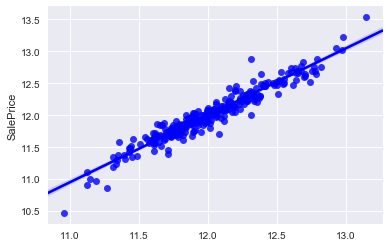

In [48]:
# ploting a reg graph with sns

rd = sns.regplot(clf_predict_mod,y_test,color="blue")
plt.show()

<b>Summary</b>

In the above finished project;

1.) We implemented both Linear and Non-Linear Regression i.e. Gradient Boosting Regression on the datasets.
2.) Both the regression are giving the same results.
3.) To handle the Correlation, we applied Gradient Boosting Regression on all the highly correlated variable and dropped the variables that has less R2.
4.) To Treat the outliers we implemented RobustScaling Preprocessing Technique.
5.) In this way, we can predict the housing price using different datasets.